# Importing data and pre-processing

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@authors: 
"""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Function to drop weight columns
def drop_weights(data_frame):
    coltodrop = []
    for i in range(1, 81):
        coltodrop.append('WGTP' + str(i))
    return data_frame.drop(coltodrop, axis = 1)

# Function to drop allocation columns
def drop_allocations(data_frame):
    col = data_frame.columns
    coltodrop = []
    for c in col:
        if (c[0]== 'F') & (c[-1] == 'P') & \
           (c != 'FULFP') & (c != 'FULP') & (c != 'FINCP'): 
            coltodrop.append(c)
    return data_frame.drop(coltodrop, axis = 1)

# Function to recode the categorical features 
def recode(data_frame):
    # Binary categories
    dict_bin = {0: 1, 1: 2}
    bin_cols = ['HUGCL', 'NPP', 'NR', 'PSF', 'R18']
    for c in bin_cols:
        data_frame[c] = data_frame[c].map(dict_bin)
    dict_bin = {1: 2, 2: 1}
    bin_cols = ['BROADBND', 'COMPOTHX', 'DIALUP', 'HISPEED', 'LAPTOP', 'OTHSVCEX', \
                'SATELLITE', 'SMARTPHONE', 'TABLET', 'TEL', 'FS', 'BATH', 'REFR', \
                'SINK', 'STOV', 'KIT', 'RNTM']
    for c in bin_cols:
        data_frame[c] = data_frame[c].map(dict_bin)
    dict_bin = {0: 2, 1: 1}
    bin_cols = ['SRNT', 'SVAL']
    for c in bin_cols:
        data_frame[c] = data_frame[c].map(dict_bin)
    # Three categories
    dict_bin = {1: 2, 2: 1, 9:0}
    bin_cols = ['RWAT', 'RWATPR', 'PLM', 'PLMPRP', 'HOTWAT']
    for c in bin_cols:
        data_frame[c] = data_frame[c].map(dict_bin)
    dict_bin = {1: 2, 2: 1, 3: 3}
    bin_cols = ['ELEFP', 'FULFP', 'GASFP', 'WATFP']
    for c in bin_cols:
        data_frame[c] = data_frame[c].map(dict_bin)
    return data_frame
    
# Customized imputer function
# Since fill_value is a constant, we apply the function to the entire dataset
def imputer(data_frame):
    imptr = SimpleImputer(strategy = 'constant', fill_value = 0)
    relevant_cols = ['SERIALNO', 'REGION', 'DIVISION', 'ST', 'PUMA', 'FS', \
                     'HINCP', 'ADJINC', 'WIF', 'WORKSTAT', 'VEH', 'NP', 'HHL', \
                     'FPARC', 'HHT', 'HUGCL', 'HUPAC', 'LNGI', 'MULTG', 'NPF', \
                     'NPP', 'NR', 'NRC', 'PARTNER', 'PSF', 'R18', 'R65', 'SSMC', \
                     'ACCESS', 'BROADBND', 'COMPOTHX', 'DIALUP', 'HISPEED', 'LAPTOP', \
                     'OTHSVCEX', 'SATELLITE', 'SMARTPHONE', 'TABLET', 'TEL', \
                     'TYPE', 'BATH', 'BDSP', 'BLD', 'REFR', 'RMSP', 'RWAT', \
                     'RWATPR', 'SINK', 'STOV', 'TEN', 'KIT', 'MV', 'PLM', 'PLMPRP', \
                     'HOTWAT', 'SRNT', 'SVAL', 'YBL', 'CONP', 'ELEFP', 'ELEP', \
                     'FULFP', 'FULP', 'GASFP', 'GASP', 'HFL', 'INSP', 'MHP', \
                     'RNTM', 'RNTP', 'WATFP', 'WATP', 'GRNTP', 'SMOCP']
    data_frame = data_frame[relevant_cols]
    data_frame = data_frame.dropna(subset = ['FS', 'HINCP'])    
    data_frame = imptr.fit_transform(data_frame)
    return pd.DataFrame(data_frame, columns = relevant_cols)
    
# Import the nationwide data-it is presented in two files 
file_dir = '/Users/flatironschol/FIS-Projects/Module5/data/'
df = pd.read_csv('psam_h06.csv')
df = drop_weights(df)
df = drop_allocations(df)
df = recode(df)
df = imputer(df)


# More pre-processing: scaling and encoding

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""

"""
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Function to transform categorical variables
    
def encoder_transform(encoder, X):
    X_encoded = encoder.transform(X).toarray()
    encoded_feats = list(encoder.get_feature_names())
    feats = X.columns
    encoded_feats_updated = []
    for feat in encoded_feats:
        feat_split = feat.split('_')
        i = int(feat_split[0][1:])
        dummies = feat_split[1]
        feat_updated = f'{feats[i]}_{dummies}'
        encoded_feats_updated.append(feat_updated)
        print(f'Encoded {feat_updated}.')
    return pd.DataFrame(X_encoded, columns = encoded_feats_updated)
        
y = df.FS
X = df.drop(['FS', 'SERIALNO', 'REGION', 'DIVISION', 'ST', 'HOTWAT', 'PLMPRP', 'RWATPR'], axis = 1)
# Split the data into test and training samples--stratify by SNAP recipiency
X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                                    stratify = y, \
                                                    test_size = 0.2, \
                                                    random_state = 1007)
print("Completed test train split.")
# Scaling and one-hot-encoding of the training set
cont_feats = ['HINCP', 'VEH', 'NP', 'NPF', 'NRC', 'BDSP', 'BLD', 'RMSP', \
              'YBL', 'CONP', 'ELEP', 'GASP', 'FULP', 'INSP', 'MHP', \
              'RNTP', 'WATP', 'GRNTP', 'SMOCP']
sclr = StandardScaler()
X_train_cont = pd.DataFrame(sclr.fit_transform(X_train[cont_feats]), \
                            columns = cont_feats)
print("Finished scaling.")
cat_feats = X_train.drop(cont_feats, axis = 1).columns
encdr = OneHotEncoder(handle_unknown = 'ignore')
encdr.fit(X_train[cat_feats])
X_train_cat = encoder_transform(encdr, X_train[cat_feats])
X_train = pd.concat((X_train_cont, X_train_cat), axis = 1)

# Scaling and one-hot-encoding of the test set
X_test_cont = pd.DataFrame(sclr.transform(X_test[cont_feats]), \
                           columns = cont_feats)
X_test_cat = encoder_transform(encdr, X_test[cat_feats])
X_test = pd.concat((X_test_cont, X_test_cat), axis = 1)

Completed test train split.
Finished scaling.
Encoded PUMA_101.
Encoded PUMA_102.
Encoded PUMA_103.
Encoded PUMA_104.
Encoded PUMA_105.
Encoded PUMA_106.
Encoded PUMA_107.
Encoded PUMA_108.
Encoded PUMA_109.
Encoded PUMA_110.
Encoded PUMA_300.
Encoded PUMA_701.
Encoded PUMA_702.
Encoded PUMA_1100.
Encoded PUMA_1301.
Encoded PUMA_1302.
Encoded PUMA_1303.
Encoded PUMA_1304.
Encoded PUMA_1305.
Encoded PUMA_1306.
Encoded PUMA_1307.
Encoded PUMA_1308.
Encoded PUMA_1309.
Encoded PUMA_1500.
Encoded PUMA_1700.
Encoded PUMA_1901.
Encoded PUMA_1902.
Encoded PUMA_1903.
Encoded PUMA_1904.
Encoded PUMA_1905.
Encoded PUMA_1906.
Encoded PUMA_1907.
Encoded PUMA_2300.
Encoded PUMA_2500.
Encoded PUMA_2901.
Encoded PUMA_2902.
Encoded PUMA_2903.
Encoded PUMA_2904.
Encoded PUMA_2905.
Encoded PUMA_3100.
Encoded PUMA_3300.
Encoded PUMA_3701.
Encoded PUMA_3702.
Encoded PUMA_3703.
Encoded PUMA_3704.
Encoded PUMA_3705.
Encoded PUMA_3706.
Encoded PUMA_3707.
Encoded PUMA_3708.
Encoded PUMA_3709.
Encoded PUMA_3710

In [3]:
X_train.head()

,HINCP,VEH,NP,NPF,NRC,BDSP,BLD,RMSP,YBL,CONP,...,HFL_6.0,HFL_7.0,HFL_8.0,HFL_9.0,RNTM_0,RNTM_1.0,RNTM_2.0,WATFP_1.0,WATFP_2.0,WATFP_3.0
0,-0.121290,-1.709006,-1.071423,-1.169563,-0.561970,-2.290219,1.549852,-1.975683,-0.673670,-0.213087,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.620209,0.006660,0.824870,0.944122,0.440513,-1.434189,0.267488,-1.089291,-0.072487,-0.213087,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.170364,0.864493,0.824870,0.944122,1.442996,0.277871,-0.587421,0.240298,2.031653,-0.213087,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.001396,-0.851173,-1.071423,-1.169563,-0.561970,-1.434189,2.404761,-0.202898,-0.072487,-0.213087,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.252154,-0.851173,1.456967,1.472543,3.447962,0.277871,-0.587421,0.240298,0.228104,-0.213087,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### This is the calculate_vif code, but it continues to hang and I can't see why.  Beneath the following cell, I start running vif individually and dropping the max column it returns by hand.  

In [4]:
def calculate_vif(X, thresh=100):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        print('Entered while loop')
        dropped=False
        c = X[cols[variables]].values
        print('Created c')
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]
        print('Calculated vif')
        maxloc = vif.index(max(vif))
        print(f'Max = {maxloc} at {max(vif)}')
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True
    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

### Manual vif and column dropping

In [5]:
c = X_train[X_train.columns[np.arange(X.shape[1])]].values
print('Created c')
vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]
print('Calculated vif')
maxloc = vif.index(max(vif))
print(f'Max = {maxloc} at {max(vif)}')

Created c
Calculated vif
Max = 17 at 183.38035314331293


In [6]:
X_train.iloc[:,17]

0         0.275597
1         0.318254
2        -0.662864
3         0.867467
4        -0.662864
            ...   
107418    1.664092
107419   -0.662864
107420   -0.023004
107421   -0.662864
107422   -0.662864
Name: GRNTP, Length: 107423, dtype: float64

In [7]:
X_train = X_train.drop(columns = ['GRNTP'])

In [8]:
c = X_train[X_train.columns[np.arange(X.shape[1])]].values
print('Created c')
vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]
print('Calculated vif')
maxloc = vif.index(max(vif))
print(f'Max = {maxloc} at {max(vif)}')

Created c
Calculated vif
Max = 2 at 7.861800044133322


In [9]:
X_train.iloc[:,2]

0        -1.071423
1         0.824870
2         0.824870
3        -1.071423
4         1.456967
            ...   
107418   -1.071423
107419   -0.439326
107420    2.089065
107421    0.824870
107422    0.824870
Name: NP, Length: 107423, dtype: float64

In [10]:
X_train = X_train.drop(columns = ['NP'])

In [11]:
c = X_train[X_train.columns[np.arange(X.shape[1])]].values
print('Created c')
vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]
print('Calculated vif')
maxloc = vif.index(max(vif))
print(f'Max = {maxloc} at {max(vif)}')

Created c
Calculated vif
Max = 4 at 3.5718768321254966


### After identifying the columns with collinearity issues, I drop them from X_test as well.

In [12]:
X_test = X_test.drop(columns = ['NP', 'GRNTP'])

In [13]:
X_train.head()

,HINCP,VEH,NPF,NRC,BDSP,BLD,RMSP,YBL,CONP,ELEP,...,HFL_6.0,HFL_7.0,HFL_8.0,HFL_9.0,RNTM_0,RNTM_1.0,RNTM_2.0,WATFP_1.0,WATFP_2.0,WATFP_3.0
0,-0.121290,-1.709006,-1.169563,-0.561970,-2.290219,1.549852,-1.975683,-0.673670,-0.213087,-1.148211,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.620209,0.006660,0.944122,0.440513,-1.434189,0.267488,-1.089291,-0.072487,-0.213087,-0.687579,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.170364,0.864493,0.944122,1.442996,0.277871,-0.587421,0.240298,2.031653,-0.213087,-0.687579,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.001396,-0.851173,-1.169563,-0.561970,-1.434189,2.404761,-0.202898,-0.072487,-0.213087,-0.503327,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.252154,-0.851173,1.472543,3.447962,0.277871,-0.587421,0.240298,0.228104,-0.213087,-0.226948,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Running vanilla LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression

In [73]:
y_train = y_train.astype('int')
clf = LogisticRegression(random_state=1007, solver='saga').fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [83]:
from sklearn.metrics import classification_report, confusion_matrix
y_test = y_test.astype('int')
print(classification_report(y_test, clf.predict(X_test)))
print(confusion_matrix(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           1       0.94      0.99      0.96     24819
           2       0.60      0.19      0.29      2037

    accuracy                           0.93     26856
   macro avg       0.77      0.59      0.62     26856
weighted avg       0.91      0.93      0.91     26856

[[24564   255]
 [ 1655   382]]


### Not terrific.  Let's try a deep GridSearchCV
### Note: this section takes a LOOOOONG time.  Skip running the next 4 cells if you'd prefer not to wait.

In [84]:
from sklearn.model_selection import GridSearchCV

In [87]:
parameters = {'penalty':('l1', 'l2', 'none'), 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1e9]}
clfgs = GridSearchCV(clf, parameters, cv = 5)

In [88]:
clfgs.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio para

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not co

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not co

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio para

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=1007, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000000000.0],
                         'penalty': ('l1', 'l2', 'none')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [90]:
print(classification_report(y_test, clf.predict(X_test)))
print(confusion_matrix(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           1       0.94      0.99      0.96     24819
           2       0.60      0.19      0.29      2037

    accuracy                           0.93     26856
   macro avg       0.77      0.59      0.62     26856
weighted avg       0.91      0.93      0.91     26856

[[24564   255]
 [ 1655   382]]


### (This is where you'd come back in if you skipped the above GridSearchCV)
### EXACTLY the same.  Not great.  The default parameters were best. 
### The classes are pretty imbalanced though (around 12:1), so SMOTE may be a good option.

In [14]:
from imblearn.over_sampling import SMOTE

In [16]:
smt = SMOTE()
y_train = y_train.astype('int')
X_train, y_train = smt.fit_sample(X_train, y_train)

In [17]:
sum(y_train == 1)/len(y_train) # shows classes are evenly distributed.

0.5

### Try another vanilla Logreg - the same parameters (C = 1, penalty = l2) came out in GridSearchCV so we'll stick with those.

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1007, solver='saga').fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [24]:
from sklearn.metrics import classification_report, confusion_matrix
y_test = y_test.astype('int')
print(classification_report(y_test, clf.predict(X_test)))
print(confusion_matrix(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           1       0.98      0.79      0.87     24819
           2       0.23      0.77      0.35      2037

    accuracy                           0.79     26856
   macro avg       0.60      0.78      0.61     26856
weighted avg       0.92      0.79      0.83     26856

[[19573  5246]
 [  475  1562]]


### Now precision is low but recall is much better.  Let's try to visualize the precision-recall curve here

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt

Logistic: f1=0.872 auc=0.386


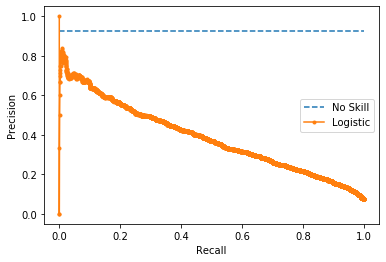

In [26]:
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = clf.predict(X_test)
y_test = np.array(y_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs, pos_label =2)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

### Let's write a quick function that returns the 10 features with the highest overall influence (as calculated by absolute value of their betas)

In [27]:
betas = np.abs(clf.coef_[0])
X_train_df = pd.concat((X_train_cont, X_train_cat), axis = 1)
important_features = []
for i in range(10):
    index = np.where(betas == max(betas))[0][0]
    feature = X_train_df.columns[index]
    important_features.append(feature)
    betas[index] = -1000

important_features


['PUMA_8509',
 'PUMA_3729',
 'NP',
 'PUMA_1302',
 'PUMA_8506',
 'HINCP',
 'PUMA_3741',
 'PUMA_3718',
 'PUMA_3763',
 'PUMA_1907']

### Lets check the betas with high positive correlation as well

In [28]:
betas = clf.coef_[0]
X_train_df = pd.concat((X_train_cont, X_train_cat), axis = 1)
important_features = []
for i in range(10):
    index = np.where(betas == max(betas))[0][0]
    feature = X_train_df.columns[index]
    important_features.append(feature)
    betas[index] = -1000

important_features

['NP',
 'PUMA_1907',
 'PUMA_6712',
 'PUMA_10701',
 'PUMA_9703',
 'WORKSTAT_3.0',
 'PUMA_2902',
 'PUMA_3755',
 'PUMA_8503',
 'PUMA_7507']

### Of the 10 highest betas, only NP, PUMA_6712 and PUMA_10701 are positively correlated.

### Let's check the ROC curve for the "2" class - recipient enrolled in SNAP

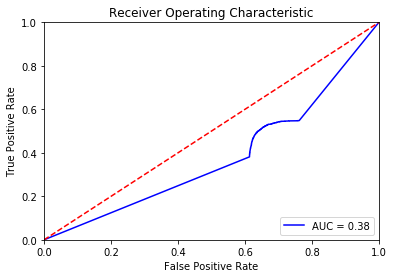

In [31]:
from sklearn.metrics import roc_curve, auc

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label = 2)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()